<a href="https://colab.research.google.com/github/harshild23/Analytics-Capstone/blob/main/Harshil_Analytics_Capstone_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [62]:
uploaded = files.upload()

Saving heart_statlog_cleveland_hungary_final.csv to heart_statlog_cleveland_hungary_final (2).csv


In [63]:
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df=pd.DataFrame(data)
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [64]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','HeartDisease']

In [65]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1190 non-null   int64  
 1   sex                      1190 non-null   int64  
 2   chest_pain_type          1190 non-null   int64  
 3   resting_blood_pressure   1190 non-null   int64  
 4   cholesterol              1190 non-null   int64  
 5   fasting_blood_sugar      1190 non-null   int64  
 6   rest_ecg                 1190 non-null   int64  
 7   max_heart_rate_achieved  1190 non-null   int64  
 8   exercise_induced_angina  1190 non-null   int64  
 9   st_depression            1190 non-null   float64
 10  st_slope                 1190 non-null   int64  
 11  HeartDisease             1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,HeartDisease
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [66]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1185,False
1186,False
1187,False
1188,False


In [67]:
df = df.drop_duplicates()
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      918 non-null    int64  
 1   sex                      918 non-null    int64  
 2   chest_pain_type          918 non-null    int64  
 3   resting_blood_pressure   918 non-null    int64  
 4   cholesterol              918 non-null    int64  
 5   fasting_blood_sugar      918 non-null    int64  
 6   rest_ecg                 918 non-null    int64  
 7   max_heart_rate_achieved  918 non-null    int64  
 8   exercise_induced_angina  918 non-null    int64  
 9   st_depression            918 non-null    float64
 10  st_slope                 918 non-null    int64  
 11  HeartDisease             918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
chest_pain_type,918.0,3.251634,0.931031,1.0,3.00,4.0,4.0,4.0
resting_blood_pressure,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
fasting_blood_sugar,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
rest_ecg,918.0,0.603486,0.805968,0.0,0.00,0.0,1.0,2.0
max_heart_rate_achieved,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
exercise_induced_angina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
st_depression,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [68]:
df_copy = df.copy()

In [69]:
df_copy['chest_pain_type'] = df_copy['chest_pain_type'].astype(object)
df_copy['rest_ecg'] = df_copy['rest_ecg'].astype(object)
df_copy['st_slope'] = df_copy['st_slope'].astype(object)

df_copy.loc[df_copy['chest_pain_type'] == 1, 'chest_pain_type'] = 'typical angina'
df_copy.loc[df_copy['chest_pain_type'] == 2, 'chest_pain_type'] = 'atypical angina'
df_copy.loc[df_copy['chest_pain_type'] == 3, 'chest_pain_type'] = 'non-anginal pain'
df_copy.loc[df_copy['chest_pain_type'] == 4, 'chest_pain_type'] = 'asymptomatic'

df_copy.loc[df_copy['rest_ecg'] == 0, 'rest_ecg'] = 'normal'
df_copy.loc[df_copy['rest_ecg'] == 1, 'rest_ecg'] = 'ST-T wave abnormality'
df_copy.loc[df_copy['rest_ecg'] == 2, 'rest_ecg'] = 'left ventricular hypertrophy'

df_copy.loc[df_copy['st_slope'] == 0, 'st_slope'] = 'normal'
df_copy.loc[df_copy['st_slope'] == 1, 'st_slope'] = 'upsloping'
df_copy.loc[df_copy['st_slope'] == 2, 'st_slope'] = 'flat'
df_copy.loc[df_copy['st_slope'] == 3, 'st_slope'] = 'downsloping'

df_copy["sex"] = df_copy["sex"].apply(lambda x: 'male' if x == 1 else 'female')

In [70]:
df_copy.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,HeartDisease
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


{'male': 725, 'female': 193}


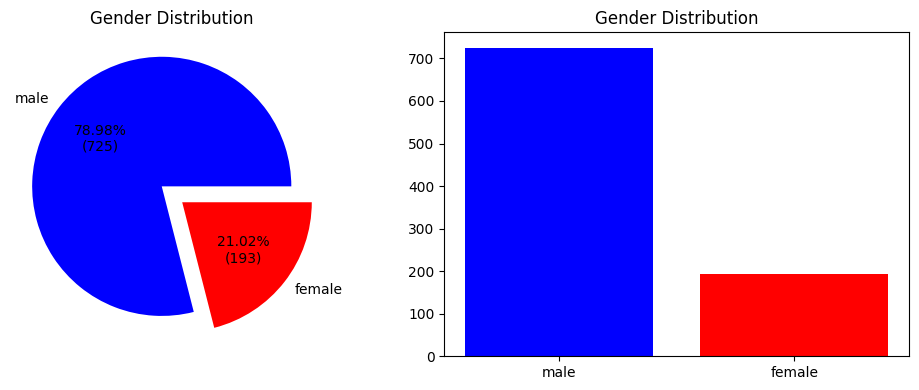

In [71]:
gender = dict(df_copy['sex'].value_counts())
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

colors_pie = ['#0000FF', '#FF0000']
colors_bar = ['#0000FF', '#FF0000']

explode = [0.1] * len(gender)

gender = dict(df_copy['sex'].value_counts())
print(gender)

axes[0].pie(
    list(gender.values()),
    labels=list(gender.keys()),
    autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p, p * sum(gender.values()) / 100),
    explode=explode,
    colors=colors_pie
)
axes[0].set_title("Gender Distribution")

axes[1].bar(list(gender.keys()), list(gender.values()),color=colors_bar)
axes[1].set_title("Gender Distribution")

plt.tight_layout()
plt.show()

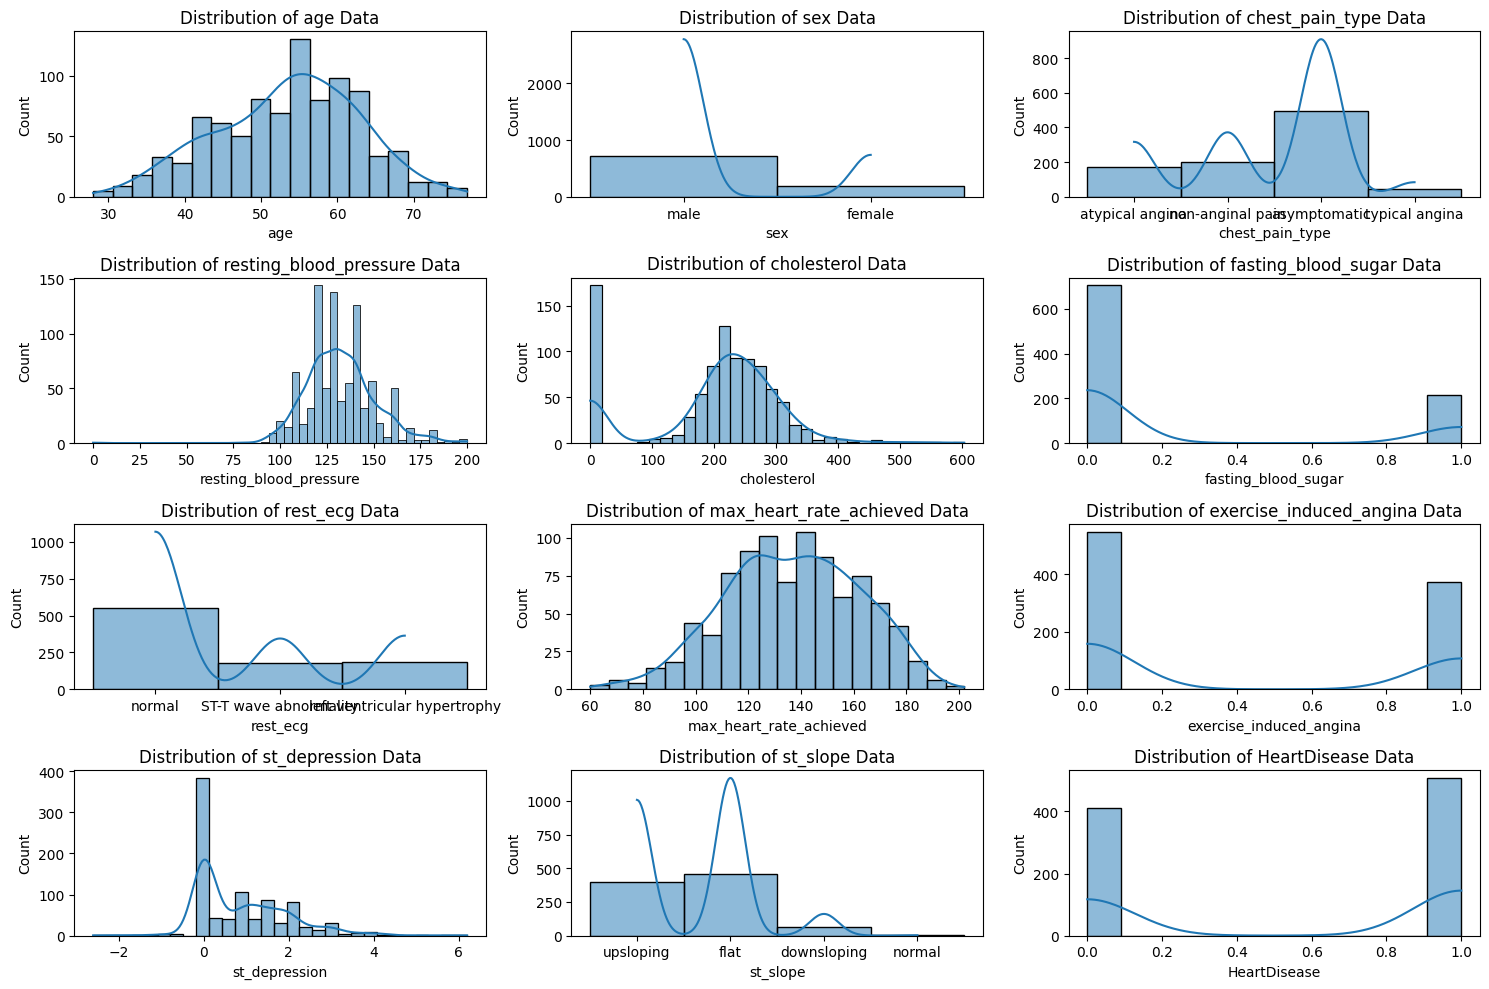

In [72]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df_copy.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df_copy[col],kde=True)
    plt.tight_layout()
    plt.plot()

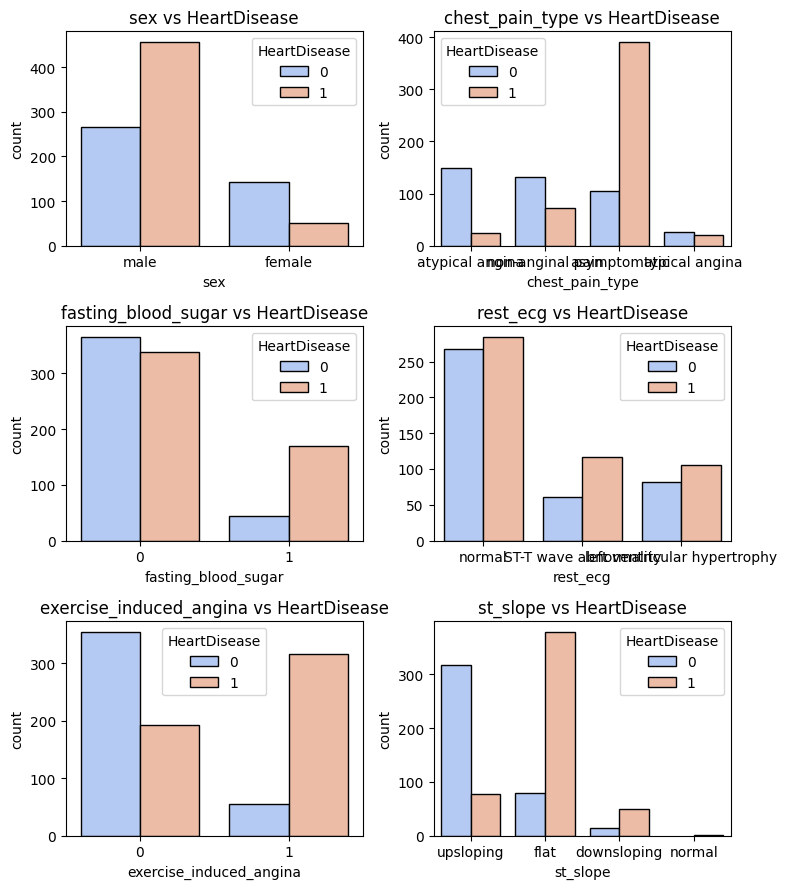

In [73]:
selected_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope']

colors = "coolwarm"

num_plots = len(selected_features)
fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(8, num_plots * 1.5))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    if df_copy[feature].dtype == 'object' or df_copy[feature].nunique() < 10:
        sns.countplot(x=feature, hue='HeartDisease', data=df_copy, palette=colors, edgecolor='black', ax=axes[i])
    else:
        sns.barplot(x='HeartDisease', y=feature, data=df_copy, palette=colors, ax=axes[i])

    axes[i].set_title(f"{feature} vs HeartDisease")

plt.tight_layout()
plt.show()



*   Male population has more heart disease patients than no heart disease patients. In the case of Female population, heart disease patients are less than no heart disease patients.
*  Asymptomatic type of chest pain boldly points towards major chances of heart disease.
*  Fasting Blood Sugar is tricky! Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients.
*  RestingECG does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.
*  Exercise Induced Engina definitely bumps the probability of being diagnosed with heart diseases.
*  With the ST_Slope values, flat slope displays a very high probability of being diagnosed with heart disease. Down also shows the same output but in very few data points.



<ipython-input-74-d8cda72a0b93>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=feature, data=df_copy, palette=colors, ax=axes[i])
<ipython-input-74-d8cda72a0b93>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=feature, data=df_copy, palette=colors, ax=axes[i])
<ipython-input-74-d8cda72a0b93>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=feature, data=df_copy, palette=colors, ax=axes[i])
<ipython-input-74-d8cda72a0b93>:9: FutureWarning: 

Passing `palette` without assigning `hu

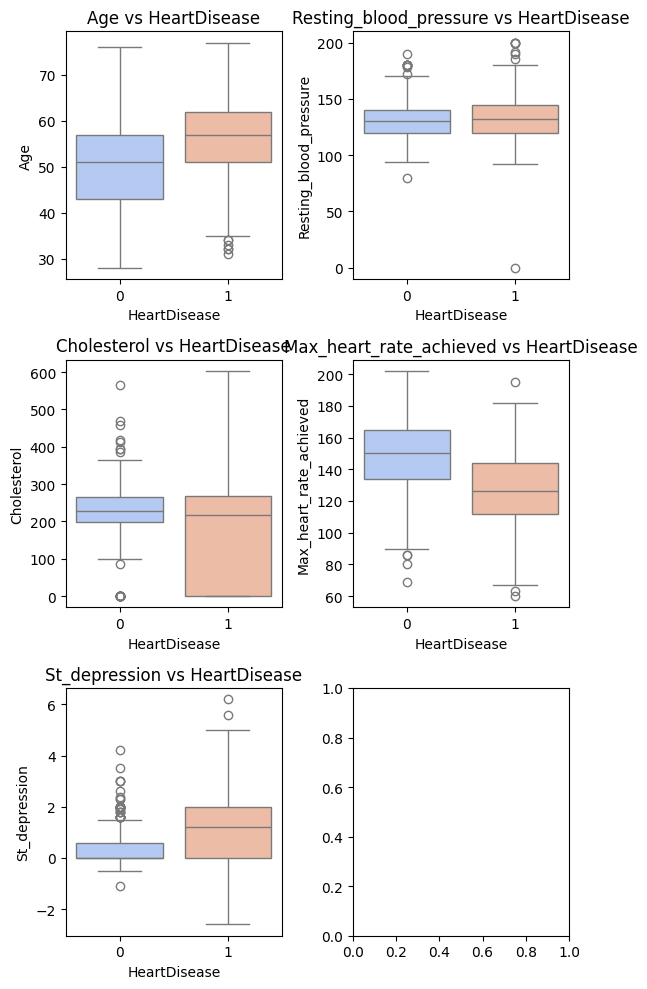

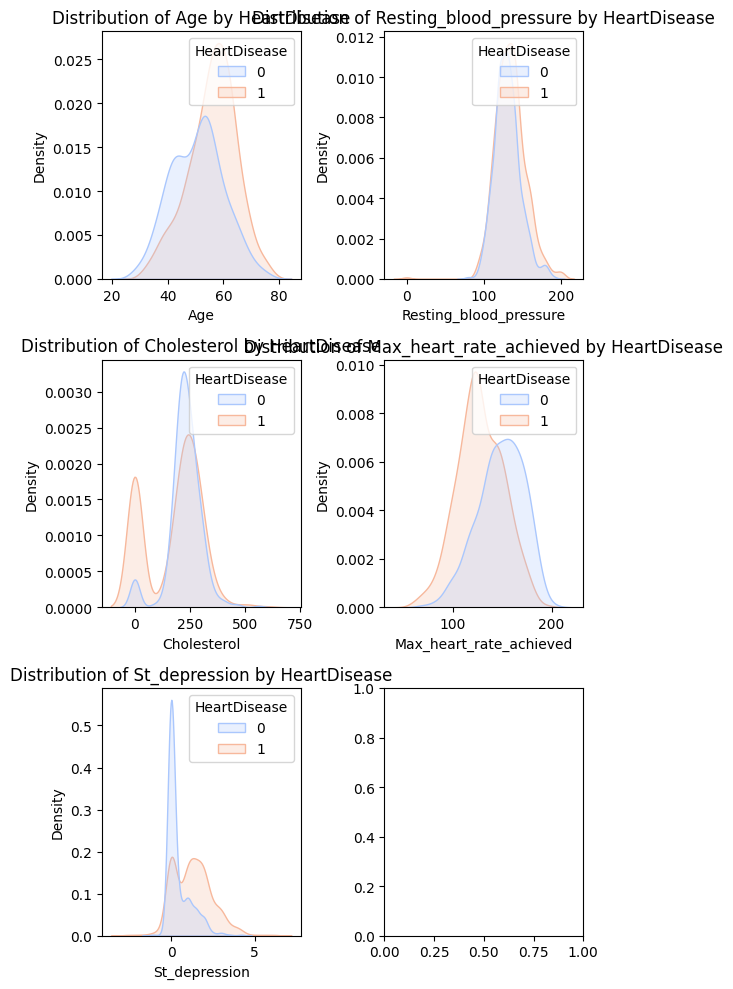

In [74]:
features = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
colors = 'coolwarm'

num_features = len(features)
fig, axes = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(6, num_features * 2))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x='HeartDisease', y=feature, data=df_copy, palette=colors, ax=axes[i])
    axes[i].set_title(f"{feature.capitalize()} vs HeartDisease")
    axes[i].set_xlabel('HeartDisease')
    axes[i].set_ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(6, num_features * 2))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.kdeplot(data=df_copy, x=feature, hue='HeartDisease', fill=True, palette=colors, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature.capitalize()} by HeartDisease")
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


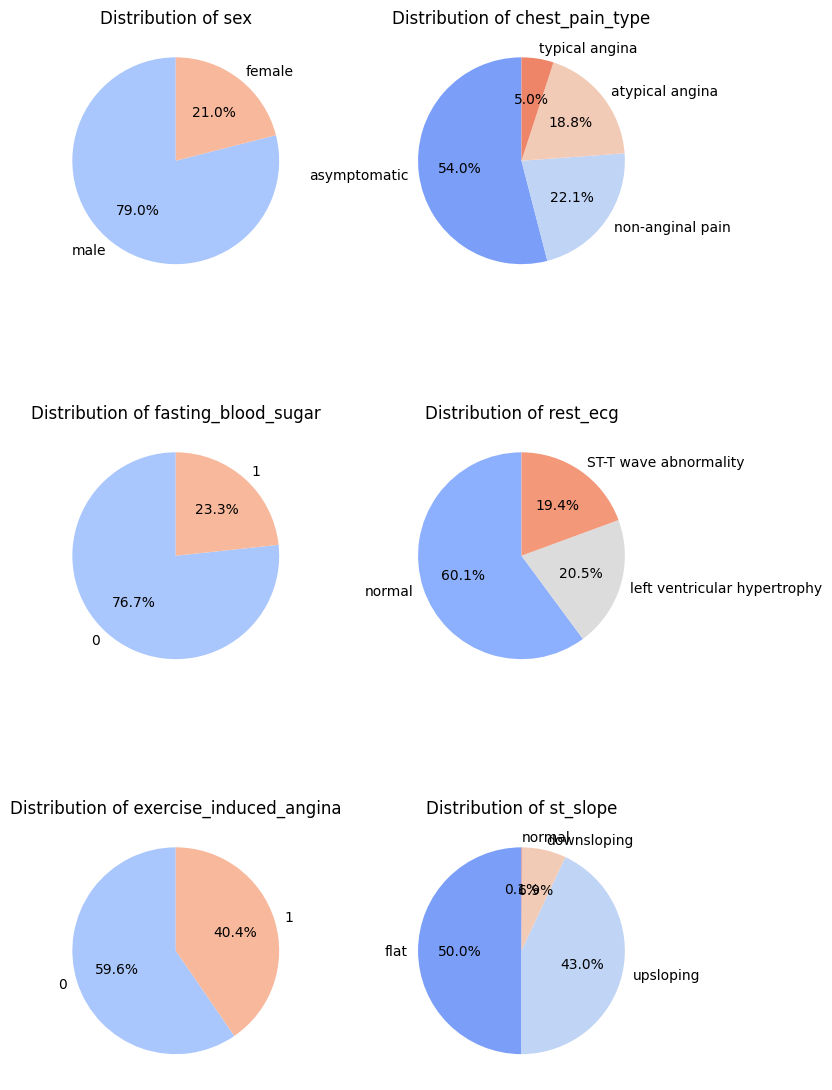

In [75]:
selected_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope']

num_plots = len(selected_features)
fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(8, num_plots * 2))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    counts = df_copy[feature].value_counts()

    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(counts)), startangle=90)

    axes[i].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

*  Out of all the heart disease patients, a staggering 79% patients are male.
*  When it comes to the type of chest pain, ASY type holds the majority with 54% that lead to heart diseases.
*  Fasting Blood Sugar level < 120 mg/dl displays high chances of heart diseases.
*  For RestingECG, Normal level accounts for 60% chances of heart diseases than LVH and ST levels.
*  Detection of Exercise Induced Angina also points towards heart diseases.
*  When it comes to ST_Slope readings, Flat level holds a massive chunk with 50% that may assist in detecting underlying heart problems.

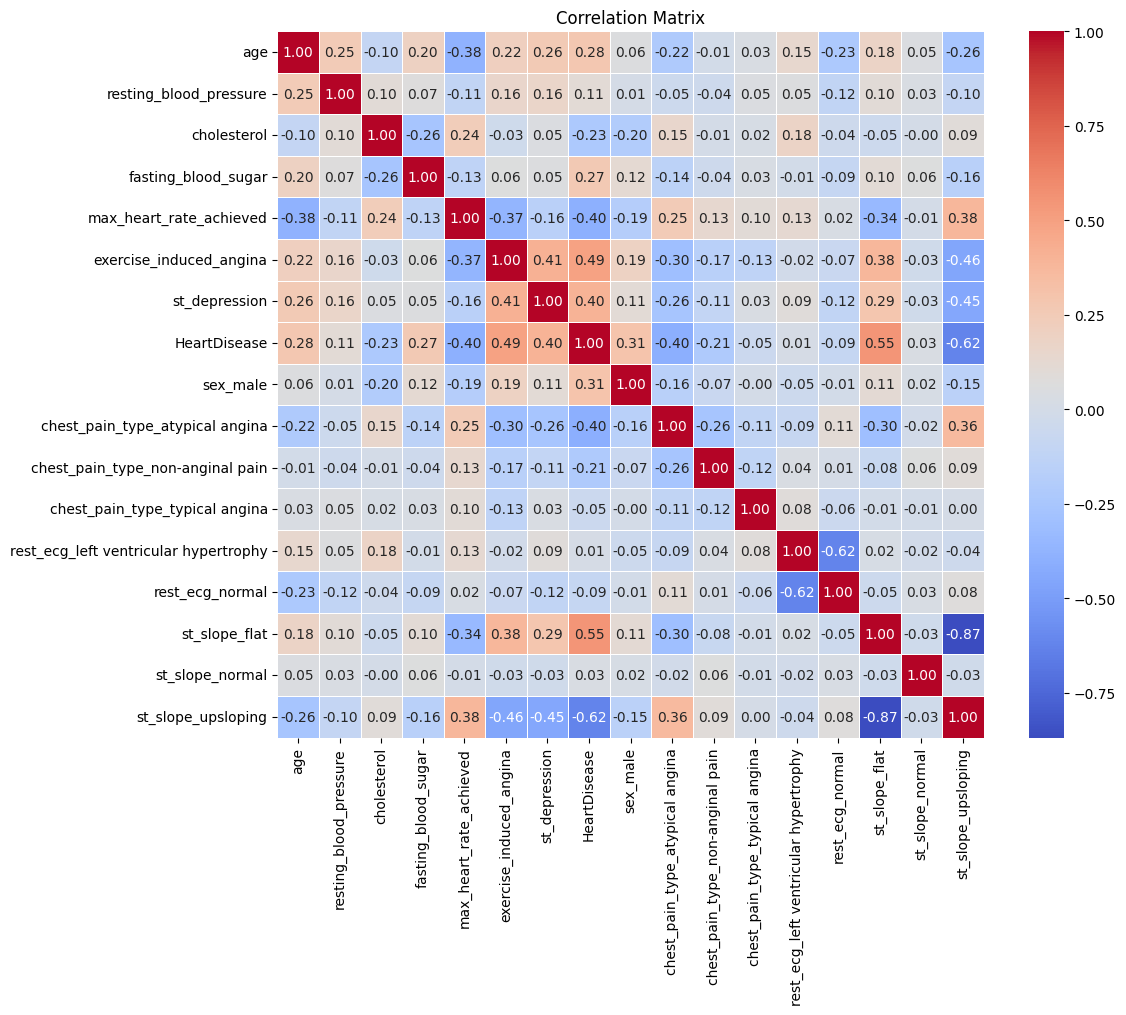

In [76]:
df_encoded = pd.get_dummies(df_copy, drop_first=True)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True, linewidths=0.5)

plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

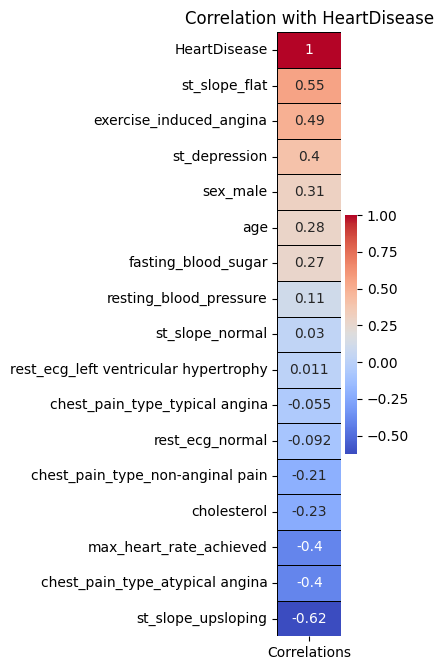

In [77]:
colors = 'coolwarm'

df_encoded = pd.get_dummies(df_copy, drop_first=True)

corr = df_encoded.corrwith(df_encoded['HeartDisease']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

plt.figure(figsize=(4, len(corr) * 0.4))
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=True)

plt.title('Correlation with HeartDisease')

plt.tight_layout()
plt.show()

In [78]:
df_encoded = pd.get_dummies(df, columns=['sex', 'chest_pain_type', 'rest_ecg', 'st_slope'], drop_first=True)

features_to_scale = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']

scaler = StandardScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

features = df_encoded.drop(['HeartDisease'], axis=1).values
target = df_encoded['HeartDisease'].values

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

def model(classifier):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

def model_evaluation(classifier):

    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    print(classification_report(y_test,classifier.predict(x_test)))

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best ROC-AUC for KNN: 0.9176708834864323
Accuracy :  85.87%
Cross Validation Score :  92.54%
ROC_AUC Score :  85.78%


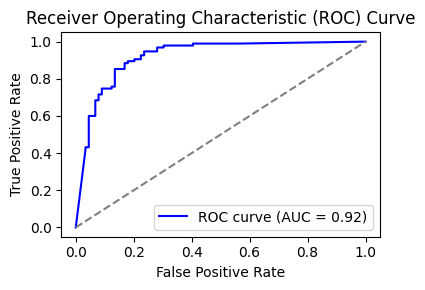

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        89
           1       0.85      0.88      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



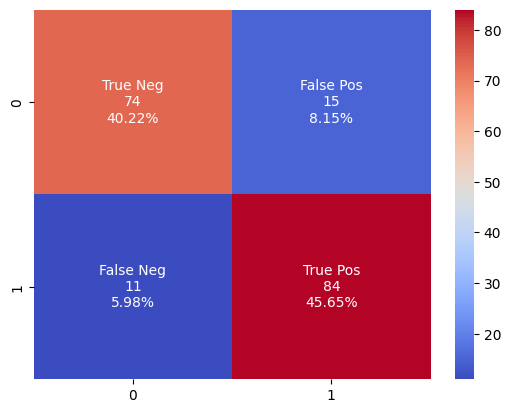

In [79]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=10, scoring='roc_auc', n_jobs=-1)
grid_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best ROC-AUC for KNN:", grid_knn.best_score_)

best_knn = grid_knn.best_estimator_

model(best_knn)
model_evaluation(best_knn)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best ROC-AUC for Decision Tree: 0.8953916066149299
Accuracy :  80.43%
Cross Validation Score :  89.12%
ROC_AUC Score :  80.45%


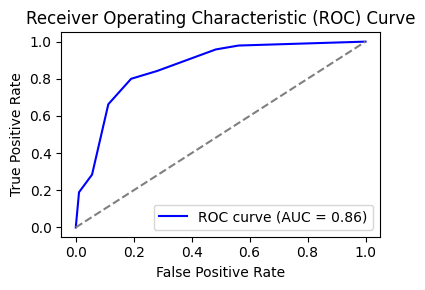

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        89
           1       0.82      0.80      0.81        95

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



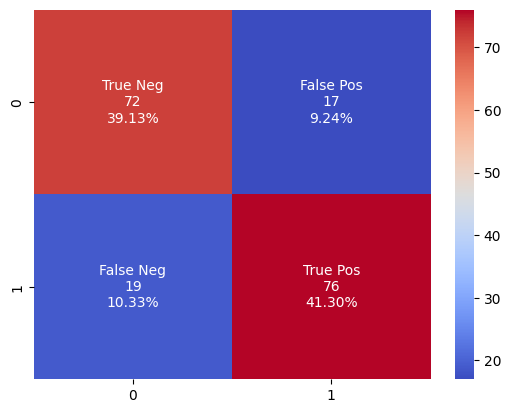

In [80]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=1000)

grid_dt = GridSearchCV(dt, param_grid_dt, cv=10, scoring='roc_auc', n_jobs=-1)
grid_dt.fit(x_train, y_train)

print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best ROC-AUC for Decision Tree:", grid_dt.best_score_)

best_dt = grid_dt.best_estimator_

model(best_dt)
model_evaluation(best_dt)

Best parameters for Logistic Regression: {'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Best ROC-AUC for Logistic Regression: 0.9270249313694434
Accuracy :  83.70%
Cross Validation Score :  92.62%
ROC_AUC Score :  83.50%


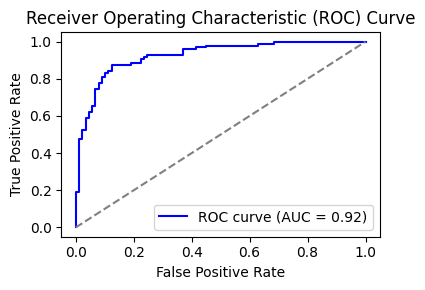

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        89
           1       0.81      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



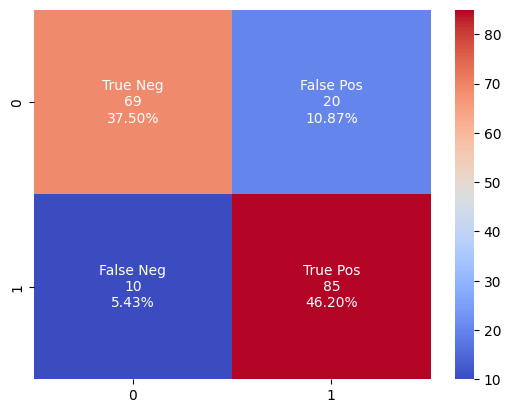

In [81]:
param_grid_lr = [
    {'penalty': ['l2'], 'solver': ['liblinear'], 'C': [0.01, 0.1, 1, 10]},
    {'penalty': ['l1'], 'solver': ['liblinear'], 'C': [0.01, 0.1, 1, 10]},
    {'penalty': ['l2'], 'solver': ['saga'], 'C': [0.01, 0.1, 1, 10]},
    {'penalty': ['l1'], 'solver': ['saga'], 'C': [0.01, 0.1, 1, 10]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'C': [0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]},
]

lr = LogisticRegression(max_iter=1000, random_state=1000)

grid_lr = GridSearchCV(lr, param_grid_lr, cv=10, scoring='roc_auc', n_jobs=-1, error_score='raise')
grid_lr.fit(x_train, y_train)

print("Best parameters for Logistic Regression:", grid_lr.best_params_)
print("Best ROC-AUC for Logistic Regression:", grid_lr.best_score_)


best_lr = grid_lr.best_estimator_

model(best_lr)
model_evaluation(best_lr)

In [82]:
models = [
    ('KNN', grid_knn.best_estimator_),
    ('Decision Tree', grid_dt.best_estimator_),
    ('Logistic Regression', grid_lr.best_estimator_)
]

results = []

for name, model in models:
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)
    proba_predictions = model.predict_proba(x_test)[:, 1]

    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, proba_predictions)
    cv_roc_auc = cross_val_score(model, x_train, y_train, cv=10, scoring='roc_auc').mean()

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
        'CV ROC-AUC': cv_roc_auc
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy   ROC-AUC  CV ROC-AUC
0                  KNN  0.858696  0.919279    0.917671
1        Decision Tree  0.804348  0.861443    0.895392
2  Logistic Regression  0.836957  0.924897    0.927025


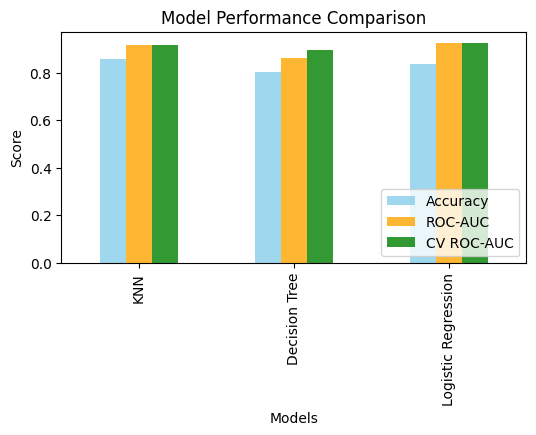

In [83]:
results_df.plot(x='Model', kind='bar', figsize=(6, 3), color=['skyblue', 'orange', 'green'], alpha=0.8)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Models')
plt.legend(loc='lower right')
plt.show()